In [30]:
import pandas as pd
import numpy as np
import sklearn

In [67]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import roc_curve

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df=fetch_openml('mnist_784',version=1)

In [34]:
type(df)

sklearn.utils.Bunch

In [35]:
X,y=df['data'],df['target']

In [36]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [37]:
y_train_5=(y_train == '5')

In [38]:
y_test_5= (y_test == '5')

In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
sgd_clf=SGDClassifier(random_state=1)

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [42]:
#y_train_5[600:1200]

In [43]:
tru=[1,2,1,2,1,2,3]
fal=[1,1,1,1,1,2,1]

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(tru,fal)

array([[3, 0, 0],
       [2, 1, 0],
       [1, 0, 0]], dtype=int64)

In [46]:
tru1=[1,2,1,2,1,2,2]
fal1=[1,1,1,1,1,2,1]

In [47]:
confusion_matrix(tru1,fal1)

array([[3, 0],
       [3, 1]], dtype=int64)

In [48]:
tru1=[1,2,1,2,1,2,2,1,1]
fal1=[1,1,1,1,1,2,1,2,2]
confusion_matrix(tru1,fal1,labels=[1,2])

array([[3, 2],
       [3, 1]], dtype=int64)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc=RandomForestClassifier(random_state=1)

In [55]:
#rfc.fit(X_train,y_train_5)
y_train_5_pred=cross_val_predict(rfc,X_train,y_train_5,cv=3,method='predict_proba')

In [57]:
type(y_train_5_pred)

numpy.ndarray

In [64]:
len(y_train_5_pred[:,1])

60000

In [65]:
y_score_forest=y_train_5_pred[:,1]

In [68]:
fpr,tpr,th=roc_curve(y_train_5,y_score_forest)

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

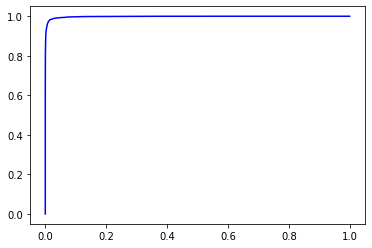

In [70]:
plt.plot(fpr,tpr,"b-",label='random')

In [71]:
y_train_5_pred1=cross_val_predict(rfc,X_train,y_train_5,cv=3,method='predict')

In [72]:
from sklearn.metrics import precision_score,recall_score

In [73]:
precision_score(y_train_5,y_train_5_pred1)

0.989013310796535

In [74]:
recall_score(y_train_5,y_train_5_pred1)

0.8634938203283528